In [1]:
import pandas as pd
import os
import torch
import torch.nn as nn
import torchvision.models as models
import numpy as np
import seaborn as sns
from sklearn.utils import shuffle, resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow import keras
from keras import layers
import matplotlib.pyplot as plt
from tabulate import tabulate
import joblib
from sklearn.svm import SVC
import pickle
class_label = ['Non-Default(0)','Default(1)'] # env var

In [2]:
# readinf the dataset
data = pd.read_csv('creditcard.csv')

<Axes: xlabel='Class', ylabel='count'>

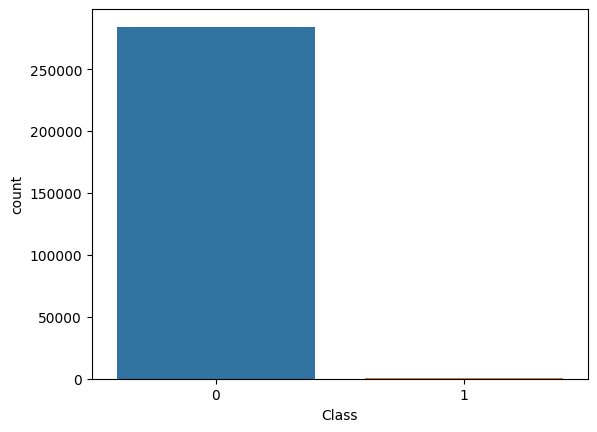

In [3]:
# seperating features and class
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sns.countplot(x='Class',data=data)

In [4]:
# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
# Load a pre-trained CNN model
model = models.vgg16(pretrained=True)

c:\Users\barath_suresh\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\barath_suresh\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to C:\Users\barath_suresh/.cache\torch\hub\checkpoints\vgg16-397923af.pth
100.0%


In [6]:
# Remove the last layer
model.classifier = nn.Sequential(*list(model.classifier.children())[:-1])

In [7]:
# Freeze the pre-trained layers
for param in model.parameters():
    param.requires_grad = False

In [13]:
# Train an SVM model using the output of the last layer of the CNN as input
train_features = []
test_features = []

In [17]:
model.eval()

for i in range(len(X_train)):
    inputs = torch.from_numpy(X_train[i]).float().unsqueeze(0).unsqueeze(0)
    outputs = model(inputs).detach().numpy()
    inputs = torch.cat((inputs, inputs, inputs), dim=1)
    train_features.append(outputs[0])

for i in range(len(X_test)):
    inputs = torch.from_numpy(X_test[i]).float().unsqueeze(0).unsqueeze(0)
    outputs = model(inputs).detach().numpy()
    inputs = torch.cat((inputs, inputs, inputs), dim=1)
    test_features.append(outputs[0])

RuntimeError: Given groups=1, weight of size [64, 3, 3, 3], expected input[1, 1, 1, 30] to have 3 channels, but got 1 channels instead

In [ ]:
svm = SVC()
svm.fit(train_features, Y_train)

In [ ]:
# Make predictions on the test set
y_pred = svm.predict(test_features)

In [ ]:
# Evaluate the accuracy of the model
accuracy = accuracy_score(Y_test, y_pred)
print(f'Accuracy: {accuracy}')